In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

### 1. Загрузить данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.

In [2]:
iris = load_iris()
iris_frame = pd.DataFrame(iris.data) # составляем датафрейм из даннных
iris_frame.columns = iris.feature_names # названия колонок в датафрейме делаем такими же как и в оригинале
iris_frame['target'] = iris.target # добавляем столбец с целевыми показателями
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x]) # сорта ириса для удобсвта
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [3]:
X = load_iris().data[50:]
y = load_iris().target[50:]
X.shape

(100, 4)

In [23]:
df = pd.get_dummies(iris_frame)
y = np.array(df['name_versicolor'])[50:]
y # необходимо было оставить только два класса.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

### 2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.

Функция максимизация 
$$
loss = \prod\limits_{i=0}^{N} p_i^{y_i}(1-p_i)^{1-y_i} \to max
$$
$$
logloss = \sum\limits_{i=0}^N ((log(p_i)^{y_i} + log(1 - p_i)^{1-y_i})
$$
$$
logloss = \sum\limits_{i=0}^N (y_i(log(p_i) + (1 - y_i)log(1 - p_i))
$$

#### Линейная регрессия
Сначала построим линейную регрессию, для этого методом градиентного спуска найдём её коэффициенты. И напишем две функции, которые в качестве аргументов принимают матрицы. 
$$
MSE = \frac{1}{n} \sum\limits_{i=1}^{i=n} (y_i - X_i w)^2
$$
$$
\frac{\partial MSE}{\partial w} = \frac{2}{n}\sum\limits_{i=1}^{i=n} (-X_i)*(y_i - X_i w)
$$

$$
\begin{array}
\textbf{X}\ = \left(
\begin{array}{ccc}
x_{0,0} & x_{0,0} & x_{0,k} \\
x_{1,0} & x_{1,1} & x_{1,k} \\
\dots & \dots & \dots \\
y_{n-1,0} & x_{n-1,1} & x_{{n-1},k} \\
\end{array}
\right)
\end{array}
\begin{array}
\textbf{Y-Y_{pred}}\ = \left(
\begin{array}{ccc}
y_0 & - & y_{pred_0} \\
y_1 & - & y_{pred_1} \\
\dots & \dots & \dots \\
y_{n-1} & - & y_{pred_{n-1}} \\
\end{array}
\right)
\end{array}
$$
$$
(Y-Y_{pred})^T @ (-X)
$$

In [24]:
# функция для вычисления среднеквадратичной ошибки
def mse_error(X, w, y):
    y_pred = X @ w
    return np.sum((y-y_pred)**2)/len(w)
# функция для вычисления градиента
def grad_mse_error(X, w, y):
    y_pred = X @ w
    return 2/len(X)*(y - y_pred)@ (-X)

In [25]:
# первоначальные значения для весов 
weights =np.zeros(iris.data.shape[1])
weights

array([0., 0., 0., 0.])

Запускае цикл градиентного спуска и вычисляме итерациионным методом веса. Если изменяются незначительно, прекратить вычисления.
$$
||w_{k+1}-w_{k}|| \leq \epsilon
$$

In [26]:
# Установим минимальный значение, в пределах которого должны меняться веса
eps = 0.0001

# размер шага
learning_rate = 0.01

costs = []
new_weight = weights
# колиечство итераций
N = 20000
for i in range(0, N):
    curent_weight = new_weight
    
    # вычисляем градиент функции mse и берем его противоположное направление
    new_weight = curent_weight - learning_rate * grad_mse_error(X, curent_weight, y)
    costs.append(mse_error(X, curent_weight, y))
    # если заданная нами точность достигнута, выйти из цикла
    if i%1000 == 0:
        print(f'Итерация: {i}; MSE : {mse_error(X, curent_weight, y)}')
    
    if np.linalg.norm(curent_weight - new_weight, ord=2) <= eps:
        print(f'Итерация: {i}; MSE : {mse_error(X, curent_weight, y)}')
        break

Итерация: 0; MSE : 12.5
Итерация: 1000; MSE : 1.7871758700424165
Итерация: 1373; MSE : 1.7746362047511792


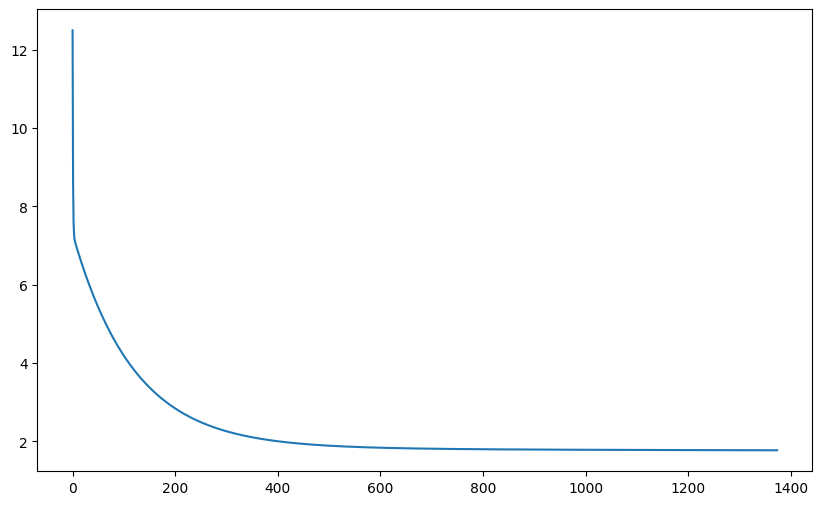

In [27]:
plt.figure(figsize=(10,6))
plt.plot(costs)
plt.show()

In [28]:
new_weight

array([ 0.45372898,  0.44799014, -0.52885789, -0.62343075])

Вычислили новые веса, построили линейную регрессию, теперь переходим к построению логистической регрессии.

#### Логистическая регрессия

Сигмоида
$$
\sigma(x) = \frac{1}{1 + \exp(x)}
$$
Производная сигмоиды
$$
\sigma'(x) = \frac{\exp{x}}{(1 + \exp(x))^2}  = \
$$
Логлосс-функция
$$
logloss = \sum\limits_{i=0, j=0,1}^N (y_j(log(p_i) + (1 - y_j)log(1 - p_i)^{1-y_j})
$$

Градиент logloss-функции
$$
\frac{ \partial logloss}{ \partial w_j }=\frac{\partial \left( \sum\limits_{i=0}^N (y_i(log(p_i) + (1 - y_i)log(1 - p_i)) \right)}{\partial w_j} = \frac{\partial \left( \sum\limits_{i=0}^N (y_i(log(\sigma( w_j \cdot X )) + (1 - y_i)log(1 - \sigma( w_j \cdot X ))) \right)}{\partial w_j} = - \left( \frac{y_i}{\sigma(w \cdot X)} - \frac{1 - y_i}{1 - \sigma(w\cdot X)}  \right)(\sigma(w \cdot X)'_{w_j} = -(y_i - \sigma(w \cdot x_i))x_{ij}
$$

In [29]:
# Строим вспомогательные функции
def sigmoid(x): # сигмоида
    return 1/(1 + np.exp(x))

def logloss(y,y_proba): # 
    logloss_1 = np.sum(np.log(y_proba[y==1]+1e-30))
    logloss_0 = np.sum(np.log(y_proba[y==1]+1e-30))
    logloss_total = -(logloss_0 + logloss_1)/len(y)
    return logloss_total

def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [30]:
test_y     = [1, 0]
test_proba = [0, 1]
logloss(test_y, test_proba), logloss(test_y, test_proba)

(69.07755278982137, 69.07755278982137)

### Метод градиентного спуска

In [31]:
# установим минимальное значение, на которое должны изменяться веса
eps = 0.01

W = np.random.randn(X.shape[1])

# размер шага
learning_rate = 0.0001
logcosts = []
new_W = W

n = 5000
for i in range(0, n):
    curent_W = new_W
    
    new_W = curent_W - learning_rate*gr_logloss(X,curent_W,y)

    if np.linalg.norm(curent_W - new_W) <=eps:
        print('Веса не меняются.')
        break
    if i%100 == 0 :
        print(f"Итерация: {i}")
        print(f"Текущая точка {curent_W}| Следующая точка {new_W}")
        y_proba = sigmoid(X @ new_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------")  
    logcosts.append(logloss(y, y_proba))

Итерация: 0
Текущая точка [ 0.64742729  0.63252963 -0.30871221  0.50540288]| Следующая точка [ 0.67673533  0.6462095  -0.28769887  0.511938  ]
Logloss 5.266063104040111
Accuracy 0.5
--------------------------------------------------------
Итерация: 100
Текущая точка [3.61406419 2.01690517 1.82024436 1.16805914]| Следующая точка [3.64374419 2.03075517 1.84154436 1.17468914]
Logloss 36.65707411661998
Accuracy 0.5
--------------------------------------------------------
Итерация: 200
Текущая точка [6.58206419 3.40190517 3.95024436 1.83105914]| Следующая точка [6.61174419 3.41575517 3.97154436 1.83768914]
Logloss 66.05133128669752
Accuracy 0.5
--------------------------------------------------------
Итерация: 300
Текущая точка [9.55006419 4.78690517 6.08024436 2.49405914]| Следующая точка [9.57974419 4.80075517 6.10154436 2.50068914]
Logloss 69.07755244852896
Accuracy 0.5
--------------------------------------------------------
Итерация: 400
Текущая точка [12.51806419  6.17190517  8.210244

Итерация: 3500
Текущая точка [104.52606419  49.10690517  74.24024436  23.71005914]| Следующая точка [104.55574419  49.12075517  74.26154436  23.71668914]
Logloss 69.07755278982137
Accuracy 0.5
--------------------------------------------------------
Итерация: 3600
Текущая точка [107.49406419  50.49190517  76.37024436  24.37305914]| Следующая точка [107.52374419  50.50575517  76.39154436  24.37968914]
Logloss 69.07755278982137
Accuracy 0.5
--------------------------------------------------------
Итерация: 3700
Текущая точка [110.46206419  51.87690517  78.50024436  25.03605914]| Следующая точка [110.49174419  51.89075517  78.52154436  25.04268914]
Logloss 69.07755278982137
Accuracy 0.5
--------------------------------------------------------
Итерация: 3800
Текущая точка [113.43006419  53.26190517  80.63024436  25.69905914]| Следующая точка [113.45974419  53.27575517  80.65154436  25.70568914]
Logloss 69.07755278982137
Accuracy 0.5
--------------------------------------------------------


/var/folders/kx/kq97lz2s39jdxr03l8m6m_7h0000gn/T/ipykernel_26115/2995500525.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(x))


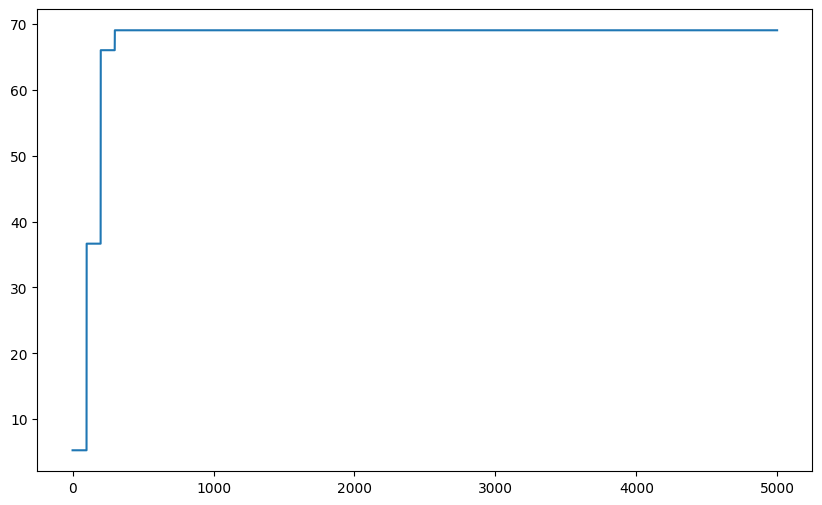

In [32]:
plt.figure(figsize=(10,6))
plt.plot(logcosts)
plt.show()

In [ ]:
# я не понимаю результатов градиентного спуска и почему такой график и почему массив y_proba заполнен нулями в итоге

In [33]:
y_proba

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### 4. Метод скользящего среднего